# Advanced Machine Learning
** Objective:** Master advanced supervised and unsupervised learning techniques, feature engineering, and model optimization.
________________________________________
### 1. Support Vector Machines (SVM): Margin-Based Classification
### What is SVM?
SVM is a powerful supervised learning algorithm used for classification and regression. It works by finding the optimal boundary (hyperplane) that maximizes the margin between different classes, making it robust for complex datasets.
**Key Concepts**
•	Hyperplane: The decision boundary that separates classes.
•	Support Vectors: Data points closest to the hyperplane, influencing its position.
•	Kernels: Functions (e.g., linear, polynomial, RBF) that transform data into higher dimensions for non-linear separation.
##### Implementation in Python
Using scikit-learn for classification:


In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train SVM with RBF kernel
model = SVC(kernel='rbf', C=1.0)
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))  # Example: 0.96


0.9333333333333333


#### Key Points
•	**Kernel Trick:** Use kernel='linear' for linearly separable data; kernel='rbf' for non-linear.
•	**C Parameter:** Controls the trade-off between misclassification and margin size (higher C allows fewer misclassifications).
•	**Use Case:** Image classification, text categorization.
•	**Tip:** Scale features (e.g., with StandardScaler) for better performance


### 2. Clustering: Grouping Unlabeled Data
#### What is Clustering?
Clustering is an unsupervised learning technique that groups similar data points together without predefined labels. It’s useful for discovering patterns, segmenting data, or reducing dimensionality.
##### Key Algorithms
•	**K-Means:** Partitions data into K clusters by minimizing the distance between points and cluster centroids.
•	**Hierarchical Clustering:** Builds a tree of clusters by merging or splitting based on distance.
##### Implementation in Python (K-Means)


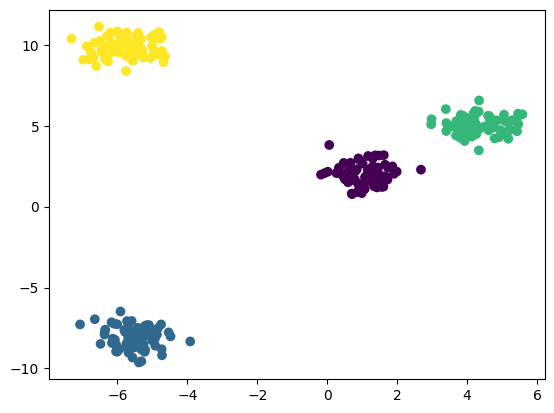

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6)

# Apply K-Means
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.show()


### Key Points
•	**Choosing K:** Use the elbow method (plot inertia vs. K) or silhouette score.
•	**Evaluation:** Silhouette score (silhouette_score(X, labels)) measures cluster quality.
•	**Use Case:** Customer segmentation, anomaly detection.
•	**Tip:** Standardize data if features have different scales.


### 3. Dimensionality Reduction: Simplifying Data
What is Dimensionality Reduction?
Dimensionality reduction techniques reduce the number of features while preserving essential information, making data easier to visualize and models faster to train.
##### Key Techniques
•	**Principal Component Analysis (PCA):** Projects data onto orthogonal axes (principal components) that capture maximum variance.
•	t-SNE: Visualizes high-dimensional data in 2D or 3D by preserving local structures.
**Implementation in Python (PCA)**


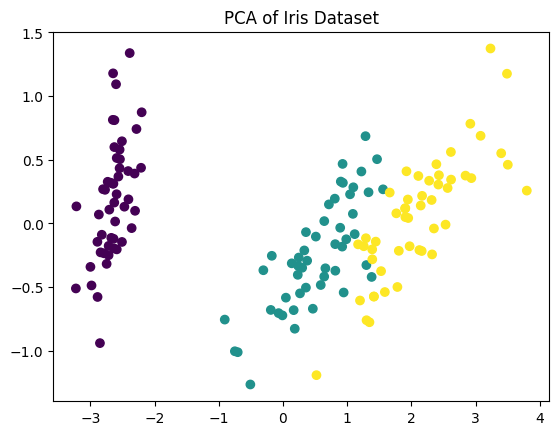

In [3]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load data
X, y = load_iris(return_X_y=True)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("PCA of Iris Dataset")
plt.show()


#### Key Points
•	**Explained Variance:** Check pca.explained_variance_ratio_ to see how much information each component retains.
•	**Use Case:** Visualize high-dimensional data, speed up model training.
•	**Tip:** Use PCA before clustering or classification to reduce noise.


### 4. Ensemble Methods: Combining Models
What are Ensemble Methods?
Ensemble methods combine multiple models to improve performance, reduce overfitting, and increase robustness. They’re like a team of experts making a collective decision.
#### Key Techniques
•	**Random Forest:** An ensemble of decision trees, each trained on a random subset of data and features.
•	**Gradient Boosting:** Sequentially trains models to correct errors of previous ones (e.g., XGBoost, LightGBM).
**Implementation in Python (Random Forest)**


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=3)
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))  # Example: 0.97


0.9333333333333333


#### Key Points
•	**n_estimators:** Number of trees in the forest (more trees generally improve performance).
•	**Feature Importance:** Use model.feature_importances_ to see which features matter most.
•	**Use Case:** Classification, regression, feature selection.
•	**Tip:** Tune max_depth and n_estimators for better results.


### 5. Feature Engineering: Enhancing Model Performance
What is Feature Engineering?
**Feature engineering** involves creating new features or transforming existing ones to improve model accuracy. It’s often more impactful than choosing the right algorithm.
#### Techniques
•	**Polynomial Features:** Create interaction terms (e.g., x1 * x2) or higher powers (e.g., x1^2).
•	**Encoding Categorical Variables:** Use one-hot encoding (pd.get_dummies()) for nominal data.
•	**Scaling:** Standardize (StandardScaler) or normalize (MinMaxScaler) features.
•	**Binning:** Convert continuous variables into discrete bins (e.g., age groups).
**Implementation in Python (Polynomial Features)**


In [5]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Sample data
X = np.array([[1, 2], [3, 4]])

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
print(X_poly)
# Output: [[1, 1, 2, 1, 2, 4], [1, 3, 4, 9, 12, 16]] (includes bias, x1, x2, x1^2, x1*x2, x2^2)


[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]]


### Key Points
•	**Interaction Terms:** Capture relationships between features.
•	**Scaling:** Essential for algorithms like SVM and KNN.
•	**Use Case:** Improve model fit, especially for linear models.
•	**Tip:** Avoid creating too many features to prevent overfitting.


### 6. Hyperparameter Tuning: Optimizing Models
What is Hyperparameter Tuning?
**Hyperparameters** are settings you choose before training (e.g., max_depth in trees, C in SVM). Tuning them helps find the best configuration for your model.
#### Techniques
•	**Grid Search:** Exhaustively test all combinations of specified hyperparameters.
•	**Random Search:** Sample random combinations for faster exploration.
**Implementation in Python (Grid Search)**


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Perform grid search
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

# Best parameters and score
print(grid.best_params_)  # Example: {'C': 1, 'kernel': 'rbf'}
print(grid.best_score_)   # Example: 0.98


{'C': 1, 'kernel': 'linear'}
0.9833333333333332


#### Key Points
•	**Cross-Validation:** Use cv to evaluate each combination.
•	**Use Case:** Optimize any model’s performance.
•	**Tip:** Start with broad ranges, then refine.
